In [ ]:
import pickle
import numpy as np

In [ ]:
with open("/content/train_qa220120145526-220818-175522.txt","rb")as fp:
    train_data=pickle.load(fp)

In [ ]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [ ]:
with open("/content/test_qa220120145430-220818-175426.txt","rb")as fp1:
    test_data=pickle.load(fp1)

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'

In [ ]:
vocab=set()

In [ ]:
all_data=test_data+train_data

In [ ]:
type(all_data)

list

In [ ]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [ ]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [ ]:
vocab.add('yes')
vocab.add('no')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
len(vocab)

37

In [ ]:
vocab_len=len(vocab)+1

In [ ]:
for data in all_data:
    print(len(data[0]))
    print('\n')

Streaming output truncated to the last 5000 lines.


63


12


23


35


47


58


12


25


37


49


61


12


23


46


60


71


12


26


38


50


63


13


25


37


50


62


12


24


36


48


59


12


24


38


52


65


12


24


37


51


64


12


24


37


50


62


13


26


38


50


63


12


24


36


47


61


12


24


36


48


61


13


24


36


48


61


12


25


37


49


62


25


38


50


61


73


12


24


36


48


61


25


36


48


60


74


12


24


36


48


59


12


23


35


47


59


14


26


38


51


62


12


24


36


49


61


12


25


38


50


63


13


26


38


50


63


13


24


36


48


61


12


24


38


50


62


12


24


36


48


60


13


24


37


50


62


12


24


36


48


60


12


23


35


47


59


13


25


37


48


60


23


36


48


60


73


26


39


52


64


76


13


26


39


51


64


13


24


36


47


59


13


26


39


51


62


12


23


37


49


60


14


26


38


49


63


12


24


36


48

In [ ]:
max_story_len=max([len(data[0]) for data in all_data])
max_story_len

156

In [ ]:
max_ques_len=max([len(data[1]) for data in all_data])
max_ques_len

6

In [ ]:
from keras.utils import pad_sequences

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(filters=[])

In [ ]:
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'?': 1,
 '.': 2,
 'picked': 3,
 'garden': 4,
 'kitchen': 5,
 'sandra': 6,
 'journeyed': 7,
 'took': 8,
 'left': 9,
 'discarded': 10,
 'hallway': 11,
 'got': 12,
 'down': 13,
 'mary': 14,
 'milk': 15,
 'to': 16,
 'no': 17,
 'daniel': 18,
 'went': 19,
 'in': 20,
 'dropped': 21,
 'up': 22,
 'bedroom': 23,
 'bathroom': 24,
 'is': 25,
 'put': 26,
 'there': 27,
 'apple': 28,
 'travelled': 29,
 'yes': 30,
 'grabbed': 31,
 'football': 32,
 'moved': 33,
 'the': 34,
 'back': 35,
 'john': 36,
 'office': 37}

In [ ]:
train_story_text=[]
train_question_text=[]
train_answers=[]
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)

In [ ]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_question_text)

10000

In [ ]:
train_story_seq

[[14, 33, 16, 34, 24, 2, 6, 7, 16, 34, 23, 2],
 [14,
  33,
  16,
  34,
  24,
  2,
  6,
  7,
  16,
  34,
  23,
  2,
  14,
  19,
  35,
  16,
  34,
  23,
  2,
  18,
  19,
  35,
  16,
  34,
  11,
  2],
 [14,
  33,
  16,
  34,
  24,
  2,
  6,
  7,
  16,
  34,
  23,
  2,
  14,
  19,
  35,
  16,
  34,
  23,
  2,
  18,
  19,
  35,
  16,
  34,
  11,
  2,
  6,
  19,
  16,
  34,
  5,
  2,
  18,
  19,
  35,
  16,
  34,
  24,
  2],
 [14,
  33,
  16,
  34,
  24,
  2,
  6,
  7,
  16,
  34,
  23,
  2,
  14,
  19,
  35,
  16,
  34,
  23,
  2,
  18,
  19,
  35,
  16,
  34,
  11,
  2,
  6,
  19,
  16,
  34,
  5,
  2,
  18,
  19,
  35,
  16,
  34,
  24,
  2,
  18,
  3,
  22,
  34,
  32,
  27,
  2,
  18,
  19,
  16,
  34,
  23,
  2],
 [14,
  33,
  16,
  34,
  24,
  2,
  6,
  7,
  16,
  34,
  23,
  2,
  14,
  19,
  35,
  16,
  34,
  23,
  2,
  18,
  19,
  35,
  16,
  34,
  11,
  2,
  6,
  19,
  16,
  34,
  5,
  2,
  18,
  19,
  35,
  16,
  34,
  24,
  2,
  18,
  3,
  22,
  34,
  32,
  27,
  2,
  18,
  19,
 

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index,
max_story_len=max_story_len,max_question_len=max_ques_len):

    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []

    for story, query, answer in data:

        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)

        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_ques_len), np.array(Y))


In [ ]:
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [ ]:
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [ ]:
inputs_train

array([[ 0,  0,  0, ..., 34, 23,  2],
       [ 0,  0,  0, ..., 34, 11,  2],
       [ 0,  0,  0, ..., 34, 24,  2],
       ...,
       [ 0,  0,  0, ..., 34, 23,  2],
       [ 0,  0,  0, ..., 15, 27,  2],
       [ 0,  0,  0, ..., 28, 27,  2]], dtype=int32)

In [ ]:
queries_test

array([[25, 36, 20, 34,  5,  1],
       [25, 36, 20, 34,  5,  1],
       [25, 36, 20, 34,  4,  1],
       ...,
       [25, 14, 20, 34, 23,  1],
       [25,  6, 20, 34,  4,  1],
       [25, 14, 20, 34,  4,  1]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

30

In [ ]:
tokenizer.word_index['no']

17

In [ ]:
from keras.models import Sequential, Model

In [ ]:
from keras.layers import Embedding,Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [ ]:
input_sequence=Input((max_story_len,))
question=Input((max_ques_len,))

In [ ]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [ ]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [ ]:
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [ ]:
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [ ]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [ ]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [ ]:
answer=concatenate([response,question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [ ]:
answer=LSTM(32)(answer)

In [ ]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [ ]:
answer=Activation('softmax')(answer)

In [ ]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [ ]:
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=20,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 0.9092 - accuracy: 0.4921 - val_loss: 0.7059 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 7s 21ms/step - loss: 0.7066 - accuracy: 0.4951 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6984 - accuracy: 0.4918 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6960 - accuracy: 0.5044 - val_loss: 0.6946 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6960 - accuracy: 0.4980 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6959 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 0.6948 - accuracy: 0.5147 - val_loss: 0.6934 - val_accuracy: 0.4970

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

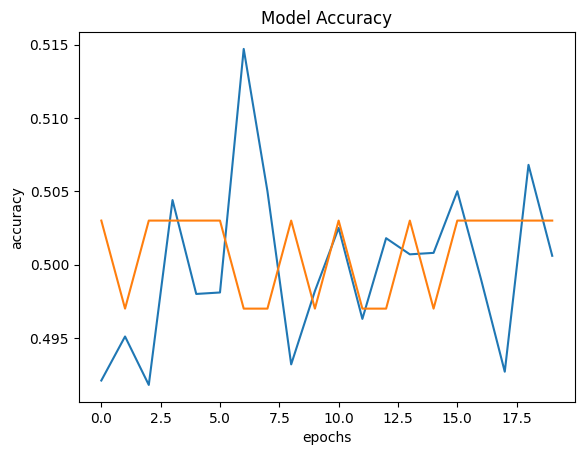

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("accuracy")
plt.xlabel("epochs")

In [ ]:
model.save("chatbot_model")

In [ ]:
model.load_weights("chatbot_model")

In [ ]:
pred_results=model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 9ms/step


In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
story=' '.join(word for word in test_data[13][0])

In [ ]:
story

'John moved to the hallway . Sandra went to the bedroom . Sandra travelled to the garden . John got the football there . Daniel went back to the bedroom . Mary moved to the bathroom . Mary went to the kitchen . Sandra went to the hallway .'

In [ ]:
query = ' '.join(word for word in test_data[13][1])
query

'Is Mary in the kitchen ?'

In [ ]:
test_data[13][2]

'yes'

In [ ]:
val_max=np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted answer is " ,k)
print("Probability of certainity ",pred_results[13][val_max])

Predicted answer is  no
Probability of certainity  0.522725


In [ ]:
story="Mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [ ]:
my_question="Is apple in the kitchen ? "
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [ ]:
mydata=[(story.split(), my_question.split(), 'yes')]

In [ ]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([my_story, my_ques]))


1/1 [==============================] - 0s 24ms/step


In [ ]:
val_max=np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted answer is " ,k)
print("Probability of certainity ",pred_results[0][val_max])

Predicted answer is  no
Probability of certainity  0.52259207
